# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from datetime import datetime, timedelta, date
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib.dates import MonthLocator, DateFormatter
from matplotlib.ticker import PercentFormatter
import warnings
warnings.filterwarnings("ignore")

# Pre-defined Functions

In [2]:
def gen_enrollment_date(start_date, end_date, df_to_copy):
    _random_dates = [start_date + timedelta(days=random.randint(0, (end_date - start_date).days)) for _ in range(100)]
    _df = df_to_copy.copy()
    _df['Enrollment Date'] = [date.strftime('%Y-%m-%d') for date in _random_dates]
    return _df

In [3]:
def sampler(df_to_sample, n):
    _df = df_to_sample.sample(n=n, random_state=42, replace=True)
    return _df

# Load Data

In [4]:
df = pd.read_csv('Dataset.csv')

In [5]:
df.dtypes

Student ID        int64
First Name       object
Last Name        object
Date of Birth    object
Gender           object
Course           object
Department       object
dtype: object

In [6]:
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'])

In [7]:
# Define the date range
start_date = datetime(2023, 5, 1)
end_date = datetime(2023, 9, 30)

main_df = gen_enrollment_date(start_date, end_date, df)

In [8]:
main_df.drop(columns=['Student ID', 'First Name', 'Last Name'], inplace=True)
main_df.head()

,Date of Birth,Gender,Course,Department,Enrollment Date
0,1998-05-15,Male,Computer Science,Engineering,2023-06-03
1,1999-03-22,Female,Biology,Science,2023-06-11
2,2000-07-10,Male,Physics,Science,2023-07-24
3,1997-11-30,Female,Mechanical Eng.,Engineering,2023-05-21
4,2001-01-18,Male,Chemistry,Science,2023-06-05


In [9]:
main_df = sampler(main_df, 1000)

In [10]:
main_df.shape

(1000, 5)

In [11]:
main_df.reset_index(drop=True, inplace=True)

In [12]:
main_df

,Date of Birth,Gender,Course,Department,Enrollment Date
0,1997-07-18,Male,Sociology,Social Sciences,2023-05-26
1,2000-06-21,Female,Linguistics,Humanities,2023-06-10
2,2002-11-12,Female,Political Science,Social Sciences,2023-05-09
3,2002-09-16,Female,Physics,Science,2023-07-08
4,1998-10-22,Female,History,Humanities,2023-08-07
...,...,...,...,...,...
995,2000-06-05,Female,Business Admin.,Business,2023-08-09
996,1999-08-19,Female,Chemistry,Science,2023-06-09
997,1999-06-28,Female,Finance,Business,2023-08-09
998,2000-02-08,Female,Computer Science,Engineering,2023-05-13


## Generate more data

In [13]:
df_2022 = gen_enrollment_date(datetime(2022, 5, 1), datetime(2022, 9, 30), df)
df_2021 = gen_enrollment_date(datetime(2021, 5, 1), datetime(2021, 9, 30), df)
df_2020 = gen_enrollment_date(datetime(2020, 5, 1), datetime(2020, 9, 30), df)
df_2019 = gen_enrollment_date(datetime(2019, 5, 1), datetime(2019, 9, 30), df)
df_2018 = gen_enrollment_date(datetime(2018, 5, 1), datetime(2018, 9, 30), df)

In [14]:
df_2022.drop(columns=['Student ID', 'First Name', 'Last Name'], inplace=True)
df_2021.drop(columns=['Student ID', 'First Name', 'Last Name'], inplace=True)
df_2020.drop(columns=['Student ID', 'First Name', 'Last Name'], inplace=True)
df_2019.drop(columns=['Student ID', 'First Name', 'Last Name'], inplace=True)
df_2018.drop(columns=['Student ID', 'First Name', 'Last Name'], inplace=True)

In [15]:
df_2022 = sampler(df_2022, 1000)
df_2021 = sampler(df_2021, 1000)
df_2020 = sampler(df_2020, 1000)
df_2019 = sampler(df_2019, 1000)
df_2018 = sampler(df_2018, 1000)

In [16]:
df_2022.reset_index(drop=True, inplace=True)
df_2021.reset_index(drop=True, inplace=True)
df_2020.reset_index(drop=True, inplace=True)
df_2019.reset_index(drop=True, inplace=True)
df_2018.reset_index(drop=True, inplace=True)

## Concatenate all to Main dataframe

In [17]:
final_df = pd.concat([main_df, df_2022, df_2021, df_2020,df_2019, df_2018], ignore_index=True)

In [18]:
final_df['Enrollment Date'] = pd.to_datetime(final_df['Enrollment Date'])

In [19]:
final_df

,Date of Birth,Gender,Course,Department,Enrollment Date
0,1997-07-18,Male,Sociology,Social Sciences,2023-05-26
1,2000-06-21,Female,Linguistics,Humanities,2023-06-10
2,2002-11-12,Female,Political Science,Social Sciences,2023-05-09
3,2002-09-16,Female,Physics,Science,2023-07-08
4,1998-10-22,Female,History,Humanities,2023-08-07
...,...,...,...,...,...
5995,2000-06-05,Female,Business Admin.,Business,2018-09-02
5996,1999-08-19,Female,Chemistry,Science,2018-05-02
5997,1999-06-28,Female,Finance,Business,2018-05-20
5998,2000-02-08,Female,Computer Science,Engineering,2018-05-29


In [20]:
# Calculate today's date
today = date.today()

# Calculate the age based on today's date and 'DateOfBirth'
final_df['Age'] = today.year - final_df['Date of Birth'].dt.year

In [21]:
final_df.columns

Index(['Date of Birth', 'Gender', 'Course', 'Department', 'Enrollment Date',
       'Age'],
      dtype='object')

In [22]:
final_df

,Date of Birth,Gender,Course,Department,Enrollment Date,Age
0,1997-07-18,Male,Sociology,Social Sciences,2023-05-26,26
1,2000-06-21,Female,Linguistics,Humanities,2023-06-10,23
2,2002-11-12,Female,Political Science,Social Sciences,2023-05-09,21
3,2002-09-16,Female,Physics,Science,2023-07-08,21
4,1998-10-22,Female,History,Humanities,2023-08-07,25
...,...,...,...,...,...,...
5995,2000-06-05,Female,Business Admin.,Business,2018-09-02,23
5996,1999-08-19,Female,Chemistry,Science,2018-05-02,24
5997,1999-06-28,Female,Finance,Business,2018-05-20,24
5998,2000-02-08,Female,Computer Science,Engineering,2018-05-29,23


# EDA

In [23]:
final_df['Department'].value_counts()

Science            1386
Engineering        1308
Business           1146
Social Sciences    1116
Humanities          822
Arts                222
Name: Department, dtype: int64

In [24]:
final_df['Course'].value_counts()

Political Science     432
Mechanical Eng.       426
Chemistry             426
Computer Science      336
Marketing             318
Electrical Eng.       312
Mathematics           306
Economics             300
Linguistics           288
Anthropology          276
History               270
English Literature    264
Finance               264
Business Admin.       264
Physics               264
Environmental Sci.    258
Graphic Design        222
Sociology             210
Psychology            198
Industrial Eng.       156
Biology               132
Civil Engineering      78
Name: Course, dtype: int64

In [25]:
for department in final_df['Department'].value_counts().index.to_list():
    print(department + ': ')
    print(final_df[final_df['Department']==department]['Course'].value_counts().index.to_list())

Science: 
['Chemistry', 'Mathematics', 'Physics', 'Environmental Sci.', 'Biology']
Engineering: 
['Mechanical Eng.', 'Computer Science', 'Electrical Eng.', 'Industrial Eng.', 'Civil Engineering']
Business: 
['Marketing', 'Economics', 'Business Admin.', 'Finance']
Social Sciences: 
['Political Science', 'Anthropology', 'Sociology', 'Psychology']
Humanities: 
['Linguistics', 'History', 'English Literature']
Arts: 
['Graphic Design']


## Univariate

In [26]:
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
sns.set_context("notebook", font_scale=.8)

<Figure size 640x480 with 0 Axes>

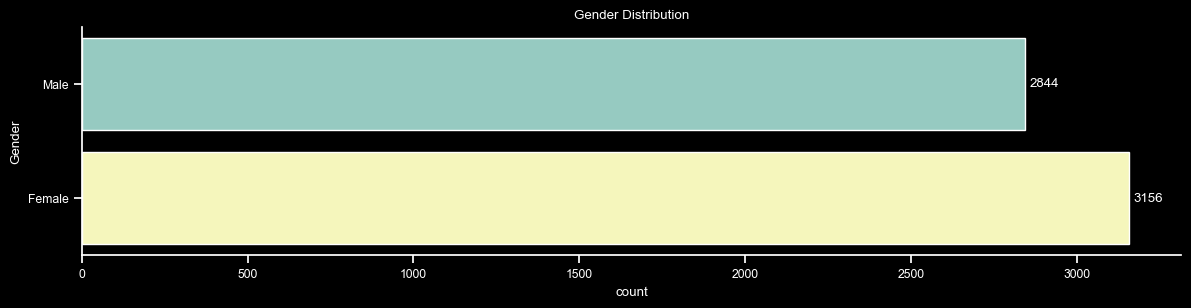

In [27]:
plt.clf()
g = sns.catplot(y='Gender', kind='count', data=final_df, orient='h',aspect=4, height=3)
plt.title("Gender Distribution")
for p in g.ax.containers:
    for i, bar in enumerate(p):
        value = bar.get_width()
        if value > 0:
            g.ax.annotate(str(int(value)), xy=(value, bar.get_y() + bar.get_height() / 2),
                          xytext=(3, 0), textcoords='offset points', ha='left', va='center')
plt.show()

<Figure size 640x480 with 0 Axes>

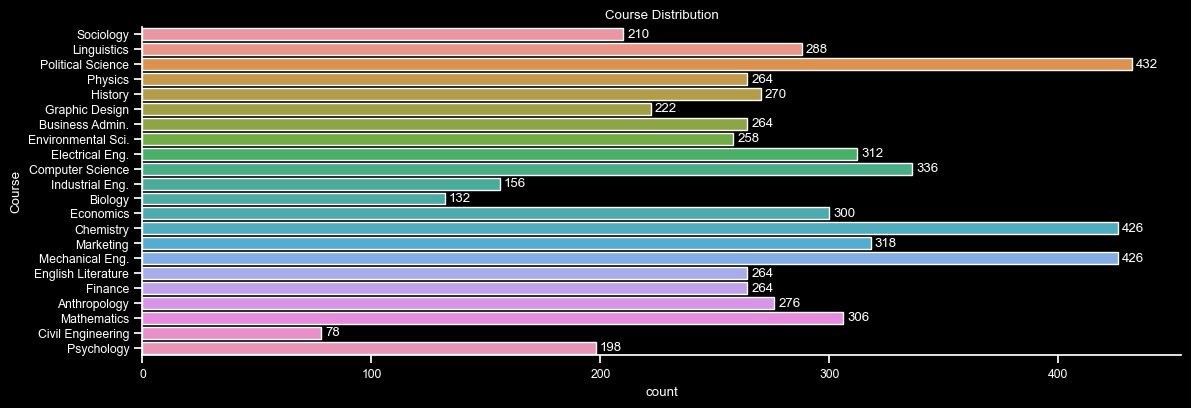

In [28]:
plt.clf()
g = sns.catplot(y='Course', kind='count', data=final_df, orient='h',aspect=3, height=4)
plt.title("Course Distribution")
for p in g.ax.containers:
    for i, bar in enumerate(p):
        value = bar.get_width()
        if value > 0:
            g.ax.annotate(str(int(value)), xy=(value, bar.get_y() + bar.get_height() / 2),
                          xytext=(3, 0), textcoords='offset points', ha='left', va='center')
plt.show()

<Figure size 640x480 with 0 Axes>

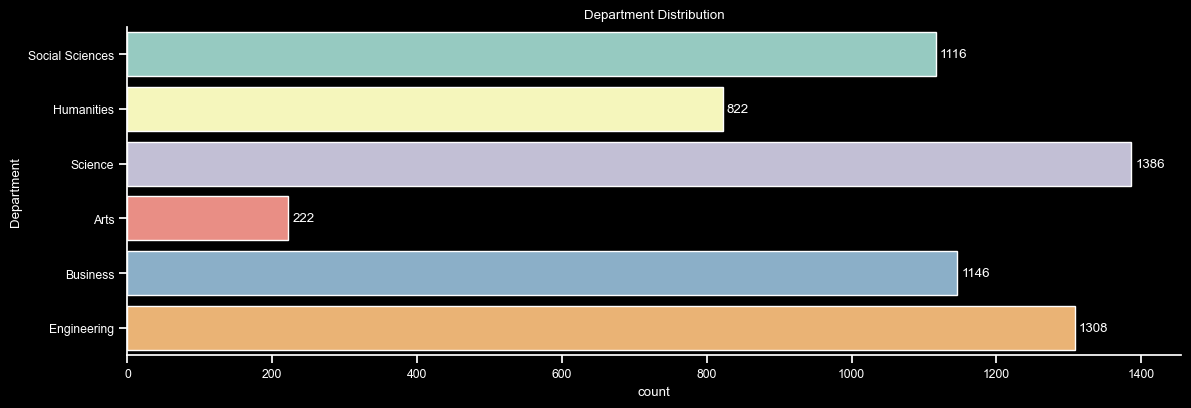

In [29]:
plt.clf()
g = sns.catplot(y='Department', kind='count', data=final_df, orient='h',aspect=3, height=4)
plt.title("Department Distribution")
for p in g.ax.containers:
    for i, bar in enumerate(p):
        value = bar.get_width()
        if value > 0:
            g.ax.annotate(str(int(value)), xy=(value, bar.get_y() + bar.get_height() / 2),
                          xytext=(3, 0), textcoords='offset points', ha='left', va='center')
plt.show()

<Figure size 640x480 with 0 Axes>

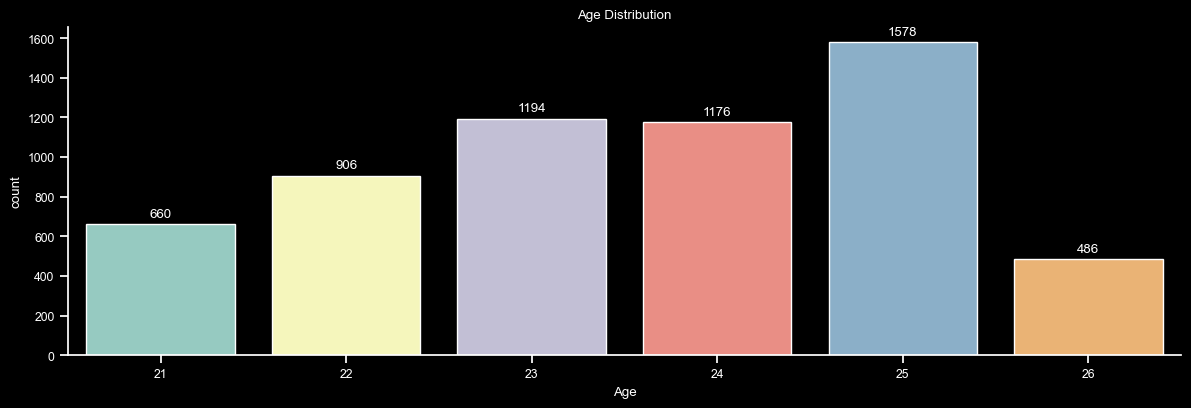

In [30]:
plt.clf()
g = sns.catplot(x='Age', kind='count', data=final_df,aspect=3, height=4)
plt.title("Age Distribution")
for p in g.ax.containers:
    for i, bar in enumerate(p):
        value = bar.get_height()
        if value > 0:
            g.ax.annotate(str(int(value)), xy=(bar.get_x() + bar.get_width() / 2, value),
                          xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')
plt.show()

## Bivariate

In [31]:
List_Departments = final_df['Department'].value_counts().index.tolist()

<Figure size 640x480 with 0 Axes>

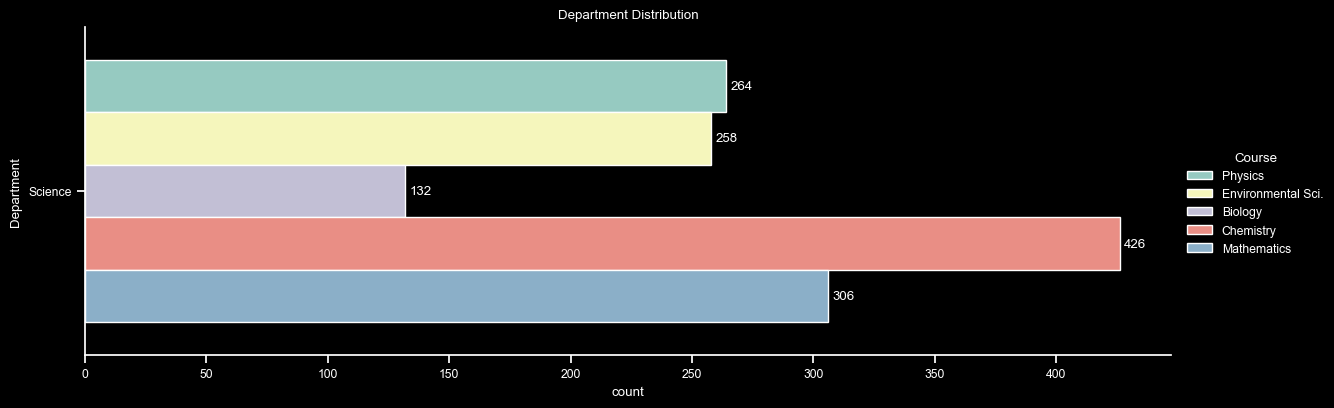

<Figure size 640x480 with 0 Axes>

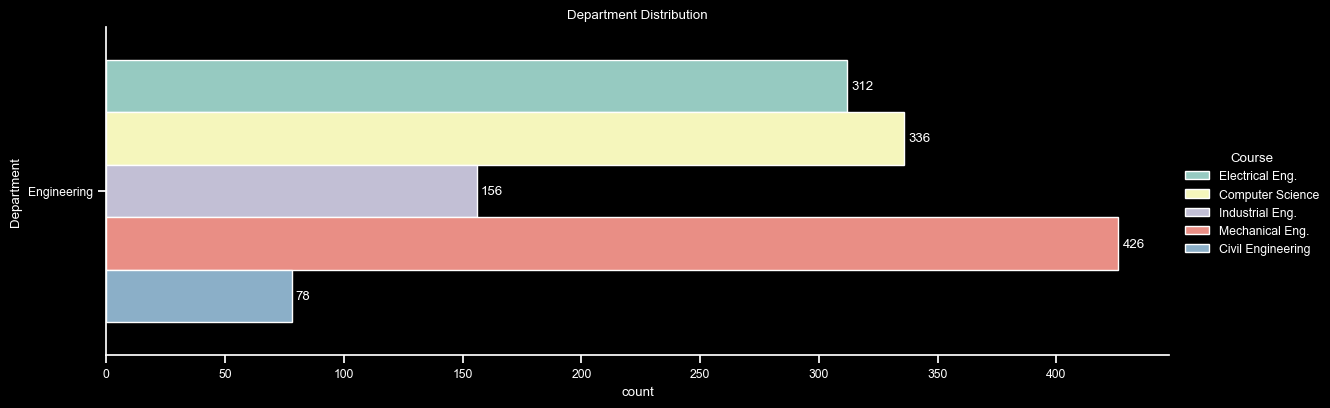

<Figure size 640x480 with 0 Axes>

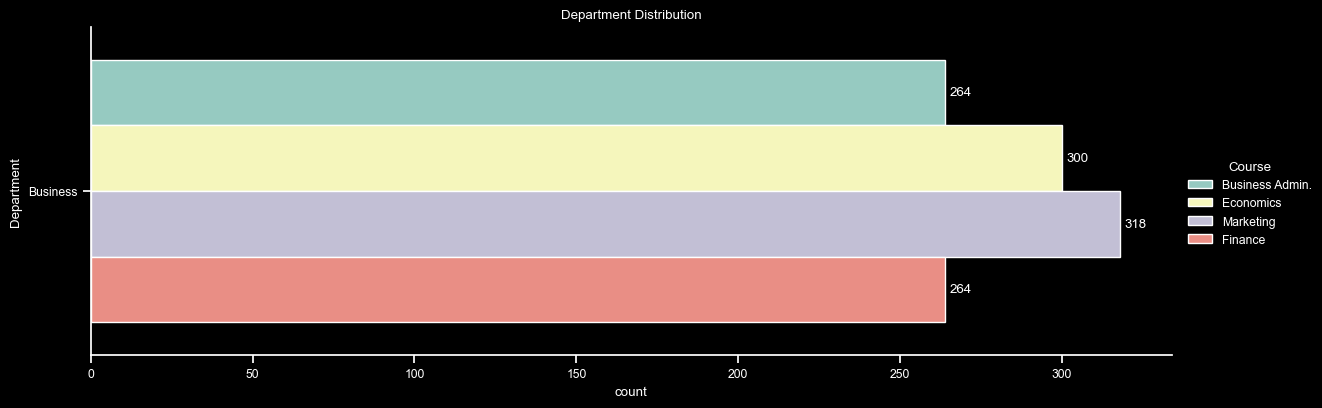

<Figure size 640x480 with 0 Axes>

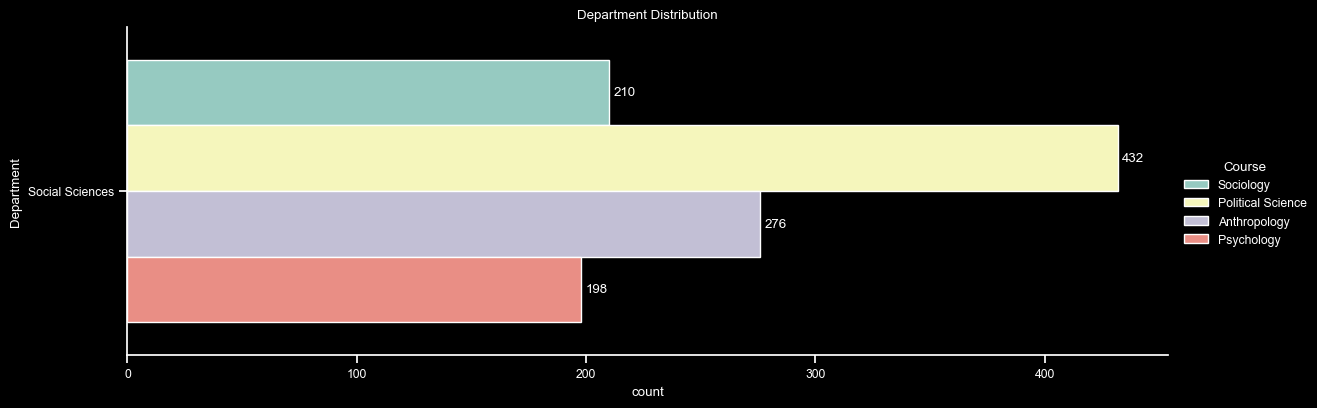

<Figure size 640x480 with 0 Axes>

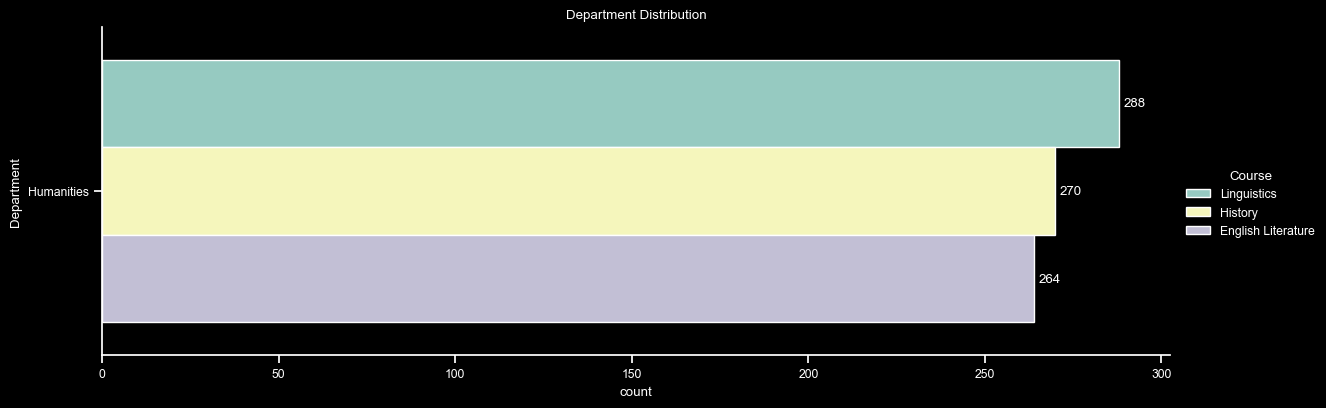

<Figure size 640x480 with 0 Axes>

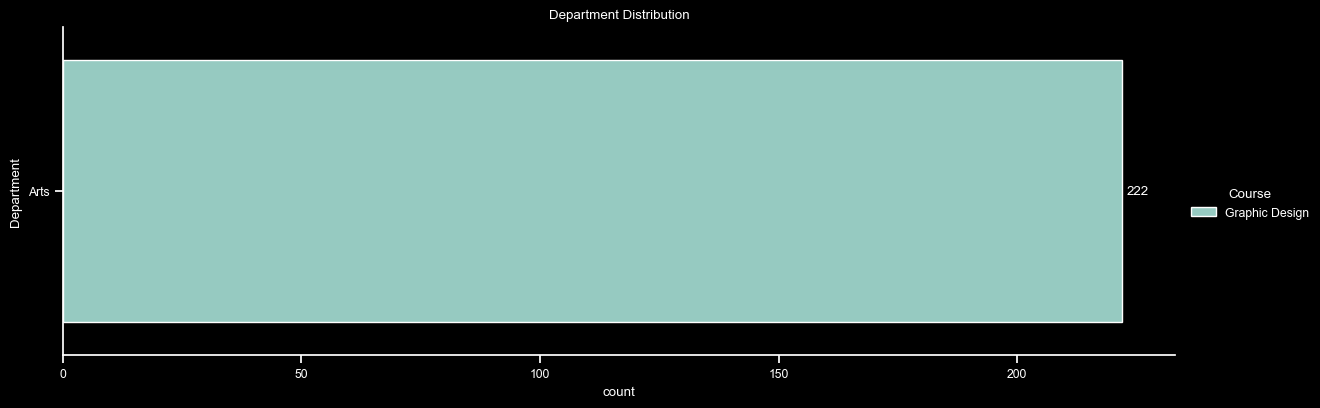

In [32]:
for departments in List_Departments:
    plt.clf()
    g = sns.catplot(y='Department', kind='count', hue='Course', data=final_df[final_df['Department']==departments], orient='h',aspect=3, height=4)
    plt.title("Department Distribution")
    for p in g.ax.containers:
        for i, bar in enumerate(p):
            value = bar.get_width()
            if value > 0:
                g.ax.annotate(str(int(value)), xy=(value, bar.get_y() + bar.get_height() / 2),
                              xytext=(3, 0), textcoords='offset points', ha='left', va='center')
    plt.show()

# Time Series

In [33]:
final_df["Month Enrolled"] = final_df["Enrollment Date"].dt.month
final_df["Day Enrolled"] = final_df["Enrollment Date"].dt.day
final_df["Day Name Enrolled"] = final_df["Enrollment Date"].dt.day_name()
final_df["Year Enrolled"] = final_df["Enrollment Date"].dt.year

In [34]:
final_df.head()

,Date of Birth,Gender,Course,Department,Enrollment Date,Age,Month Enrolled,Day Enrolled,Day Name Enrolled,Year Enrolled
0,1997-07-18,Male,Sociology,Social Sciences,2023-05-26,26,5,26,Friday,2023
1,2000-06-21,Female,Linguistics,Humanities,2023-06-10,23,6,10,Saturday,2023
2,2002-11-12,Female,Political Science,Social Sciences,2023-05-09,21,5,9,Tuesday,2023
3,2002-09-16,Female,Physics,Science,2023-07-08,21,7,8,Saturday,2023
4,1998-10-22,Female,History,Humanities,2023-08-07,25,8,7,Monday,2023


In [35]:
#Getet daily count
daily_enrollees_df = final_df.groupby(['Enrollment Date', 'Day Name Enrolled', 'Day Enrolled', 'Month Enrolled', 'Year Enrolled']).agg({'Enrollment Date': 'count'})
daily_enrollees_df = daily_enrollees_df.rename(columns={'Enrollment Date': 'Count'})
daily_enrollees_df = daily_enrollees_df.reset_index()
daily_enrollees_df.sort_values(by='Enrollment Date')

,Enrollment Date,Day Name Enrolled,Day Enrolled,Month Enrolled,Year Enrolled,Count
0,2018-05-01,Tuesday,1,5,2018,33
1,2018-05-02,Wednesday,2,5,2018,20
2,2018-05-03,Thursday,3,5,2018,15
3,2018-05-04,Friday,4,5,2018,9
4,2018-05-05,Saturday,5,5,2018,6
...,...,...,...,...,...,...
438,2023-09-20,Wednesday,20,9,2023,8
439,2023-09-21,Thursday,21,9,2023,14
440,2023-09-22,Friday,22,9,2023,8
441,2023-09-23,Saturday,23,9,2023,11


In [36]:
#Get Monthly count
monthly_enrollees_df = daily_enrollees_df.groupby(['Month Enrolled', 'Year Enrolled'])['Count'].sum()
monthly_enrollees_df = monthly_enrollees_df.reset_index()
monthly_enrollees_df['Month Enrolled'] = monthly_enrollees_df['Month Enrolled'].astype('int')
monthly_enrollees_df['Year Enrolled'] = monthly_enrollees_df['Year Enrolled'].astype('int')
monthly_enrollees_df

,Month Enrolled,Year Enrolled,Count
0,5,2018,243
1,5,2019,214
2,5,2020,124
3,5,2021,176
4,5,2022,201
5,5,2023,195
6,6,2018,205
7,6,2019,252
8,6,2020,166
9,6,2021,126


In [37]:
#Group by year to get yearly count
yearly_enrollees_df = monthly_enrollees_df.groupby(['Year Enrolled'])['Count'].sum()
yearly_enrollees_df = yearly_enrollees_df.reset_index()
yearly_enrollees_df

,Year Enrolled,Count
0,2018,1000
1,2019,1000
2,2020,1000
3,2021,1000
4,2022,1000
5,2023,1000


In [38]:
yearly_growth = yearly_enrollees_df.groupby('Year Enrolled').size().reset_index(name='Counts')

# Calculate the percentage change compared to the previous year
yearly_growth['Percentage Change'] = yearly_growth['Counts'].pct_change() * 100
yearly_growth

,Year Enrolled,Counts,Percentage Change
0,2018,1,NaN
1,2019,1,0.0
2,2020,1,0.0
3,2021,1,0.0
4,2022,1,0.0
5,2023,1,0.0


In [39]:
plt.clf()
_ = daily_enrollees_df.sort_values(by='Enrollment Date').set_index('Enrollment Date')
_decompose_results = seasonal_decompose(_["Count"], model="additive", extrapolate_trend="freq", period=217)
plt.clf()
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))
fig.set_size_inches((30, 10))
fig.suptitle('Seasonal Decomposition Plot of Enrolled Student Daily', fontsize=11)
fig.subplots_adjust(hspace=1, top=0.9, bottom=0.1)

_decompose_results.observed.plot(ax=axes[0], color='dodgerblue')
_decompose_results.trend.plot(ax=axes[1], color='dodgerblue')
_decompose_results.seasonal.plot(ax=axes[2], color='dodgerblue')

axes[0].set_title('Observed')
axes[1].set_title('Trend')
axes[2].set_title('Seasonal')

date_labels = _.index.strftime('%Y-%m').tolist()
for ax in axes:
    ax.xaxis.set_major_locator(MonthLocator())
    ax.xaxis.set_major_formatter(DateFormatter('%b %Y'))
    plt.setp(ax.get_xticklabels(), rotation=90)
    
plt.show()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

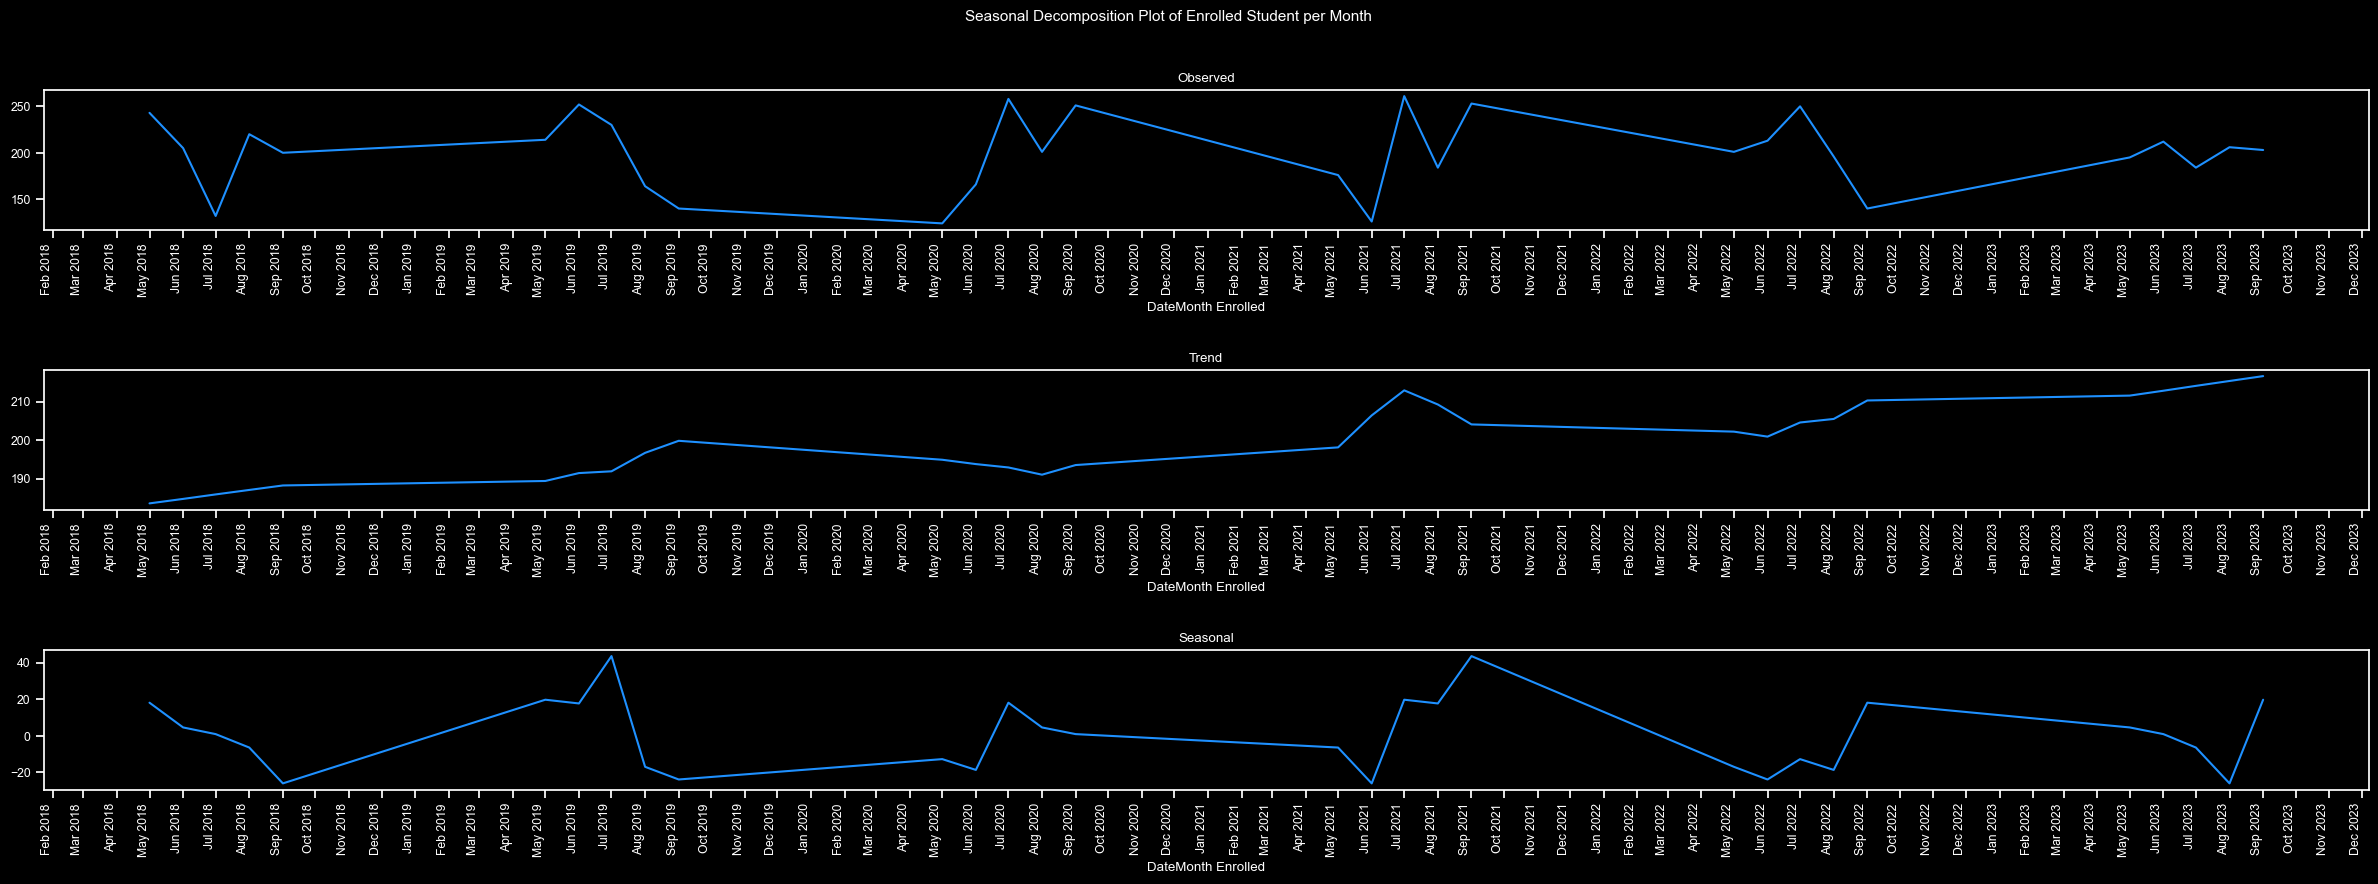

In [40]:
plt.clf()
monthly_enrollees_df['DateMonth Enrolled'] = monthly_enrollees_df['Month Enrolled'].apply(str) + '-' + monthly_enrollees_df['Year Enrolled'].apply(str)
monthly_enrollees_df['DateMonth Enrolled'] = pd.to_datetime(monthly_enrollees_df['DateMonth Enrolled'], format='%m-%Y')
_ = monthly_enrollees_df.sort_values(by='DateMonth Enrolled').set_index('DateMonth Enrolled')
_decompose_results = seasonal_decompose(_["Count"], model="additive", extrapolate_trend="freq", period=12)
plt.clf()
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))
fig.set_size_inches((30, 10))
fig.suptitle('Seasonal Decomposition Plot of Enrolled Student per Month', fontsize=11)
fig.subplots_adjust(hspace=1, top=0.9, bottom=0.1)

_decompose_results.observed.plot(ax=axes[0], color='dodgerblue')
_decompose_results.trend.plot(ax=axes[1], color='dodgerblue')
_decompose_results.seasonal.plot(ax=axes[2], color='dodgerblue')

axes[0].set_title('Observed')
axes[1].set_title('Trend')
axes[2].set_title('Seasonal')

date_labels = _.index.strftime('%Y-%m').tolist()
for ax in axes:
    ax.xaxis.set_major_locator(MonthLocator())
    ax.xaxis.set_major_formatter(DateFormatter('%b %Y'))
    plt.setp(ax.get_xticklabels(), rotation=90)
    
plt.show()

<Figure size 640x480 with 0 Axes>

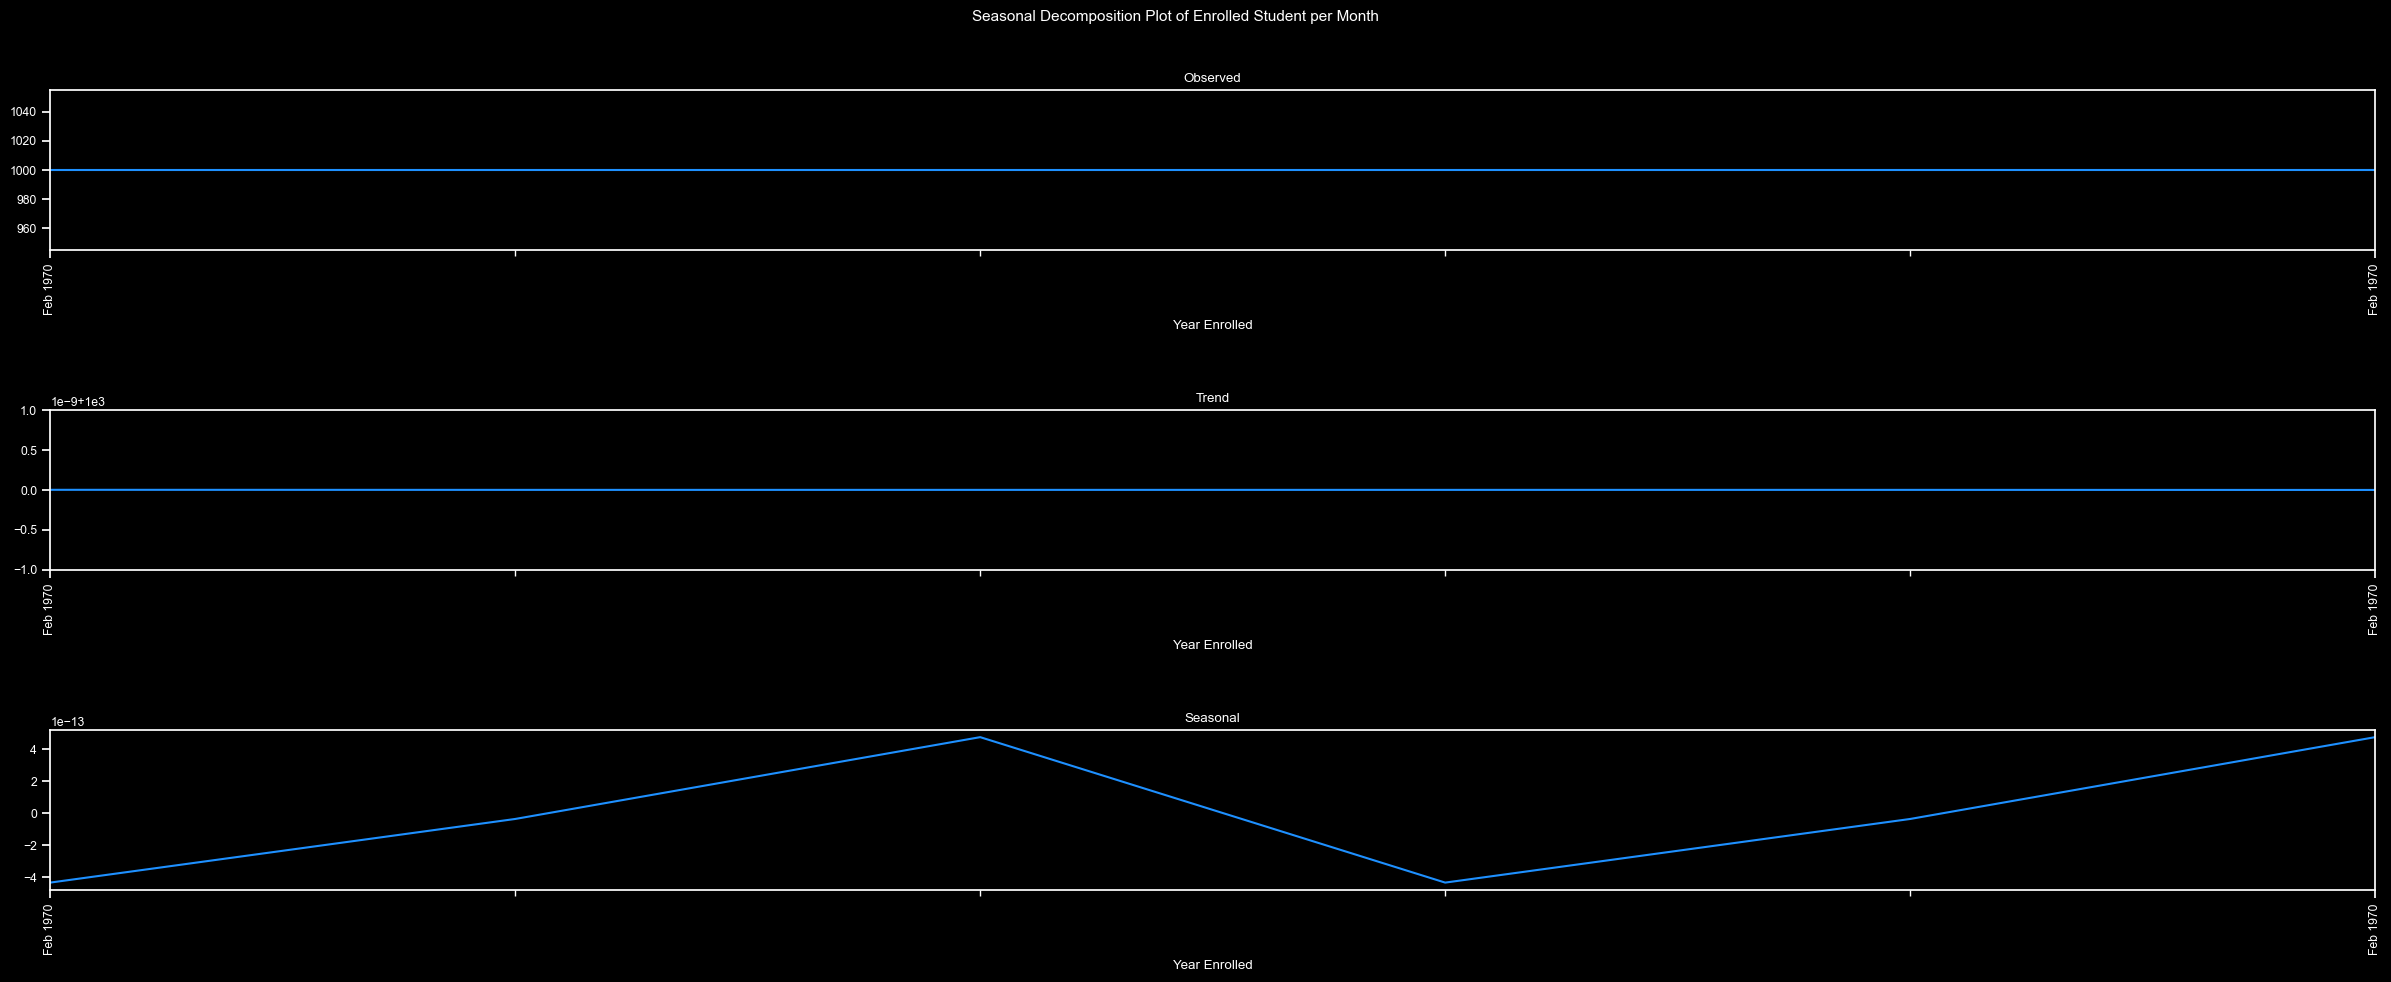

In [41]:
plt.clf()
yearly_enrollees_df['Year Enrolled'] = yearly_enrollees_df['Year Enrolled'].apply(str)
yearly_enrollees_df['Year Enrolled'] = pd.to_datetime(yearly_enrollees_df['Year Enrolled'], format='%Y')
_ = yearly_enrollees_df.sort_values(by='Year Enrolled').set_index('Year Enrolled')
_decompose_results = seasonal_decompose(_["Count"], model="additive", extrapolate_trend="freq", period=3)
plt.clf()
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))
fig.set_size_inches((30, 10))
fig.suptitle('Seasonal Decomposition Plot of Enrolled Student per Month', fontsize=11)
fig.subplots_adjust(hspace=1, top=0.9, bottom=0.1)

_decompose_results.observed.plot(ax=axes[0], color='dodgerblue')
_decompose_results.trend.plot(ax=axes[1], color='dodgerblue')
_decompose_results.seasonal.plot(ax=axes[2], color='dodgerblue')

axes[0].set_title('Observed')
axes[1].set_title('Trend')
axes[2].set_title('Seasonal')

date_labels = _.index.strftime('%Y-%m').tolist()
for ax in axes:
    ax.xaxis.set_major_locator(MonthLocator())
    ax.xaxis.set_major_formatter(DateFormatter('%b %Y'))
    plt.setp(ax.get_xticklabels(), rotation=90)
    
plt.show()

# Machine Learning

In [175]:
#Libraries to Used for Model Training, Testing, and Validation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,make_scorer

In [73]:
final_df

,Date of Birth,Gender,Course,Department,Enrollment Date,Age,Month Enrolled,Day Enrolled,Day Name Enrolled,Year Enrolled
0,1997-07-18,Male,Sociology,Social Sciences,2023-05-26,26,5,26,Friday,2023
1,2000-06-21,Female,Linguistics,Humanities,2023-06-10,23,6,10,Saturday,2023
2,2002-11-12,Female,Political Science,Social Sciences,2023-05-09,21,5,9,Tuesday,2023
3,2002-09-16,Female,Physics,Science,2023-07-08,21,7,8,Saturday,2023
4,1998-10-22,Female,History,Humanities,2023-08-07,25,8,7,Monday,2023
...,...,...,...,...,...,...,...,...,...,...
5995,2000-06-05,Female,Business Admin.,Business,2018-09-02,23,9,2,Sunday,2018
5996,1999-08-19,Female,Chemistry,Science,2018-05-02,24,5,2,Wednesday,2018
5997,1999-06-28,Female,Finance,Business,2018-05-20,24,5,20,Sunday,2018
5998,2000-02-08,Female,Computer Science,Engineering,2018-05-29,23,5,29,Tuesday,2018


In [74]:
ml_data = final_df[['Gender', 'Course', 'Department', 'Enrollment Date']]

In [75]:
ml_data = ml_data.groupby(['Enrollment Date', 'Gender', 'Department', 'Course']).agg(count=('Enrollment Date', 'size')).reset_index().set_index('Enrollment Date')
ml_data

,Gender,Department,Course,count
Enrollment Date,,,,
2018-05-01,Female,Science,Biology,13
2018-05-01,Female,Social Sciences,Anthropology,20
2018-05-02,Female,Science,Chemistry,10
2018-05-02,Male,Social Sciences,Sociology,10
2018-05-03,Male,Engineering,Mechanical Eng.,15
...,...,...,...,...
2023-09-21,Female,Business,Economics,8
2023-09-21,Female,Science,Environmental Sci.,6
2023-09-22,Male,Social Sciences,Sociology,8


In [76]:
column_names = list()
column_names.append('Enrollment Date')
combinations = final_df[['Gender', 'Department', 'Course']].drop_duplicates()

for index, row in combinations.iterrows():
    gender = row['Gender']
    department = row['Department']
    course = row['Course']
    
    # Create a unique column name
    column_name = f'{gender}_{department}_{course}'
    column_names.append(column_name)
    
print(column_names)

['Enrollment Date', 'Male_Social Sciences_Sociology', 'Female_Humanities_Linguistics', 'Female_Social Sciences_Political Science', 'Female_Science_Physics', 'Female_Humanities_History', 'Male_Arts_Graphic Design', 'Female_Business_Business Admin.', 'Female_Science_Environmental Sci.', 'Female_Engineering_Electrical Eng.', 'Female_Engineering_Computer Science', 'Male_Science_Physics', 'Female_Engineering_Industrial Eng.', 'Female_Science_Biology', 'Female_Business_Economics', 'Male_Science_Chemistry', 'Male_Business_Marketing', 'Male_Engineering_Mechanical Eng.', 'Male_Humanities_English Literature', 'Female_Business_Finance', 'Male_Business_Finance', 'Female_Social Sciences_Anthropology', 'Female_Humanities_English Literature', 'Female_Business_Marketing', 'Male_Humanities_History', 'Female_Engineering_Mechanical Eng.', 'Male_Science_Mathematics', 'Female_Arts_Graphic Design', 'Female_Science_Mathematics', 'Female_Engineering_Civil Engineering', 'Male_Business_Economics', 'Male_Science

In [77]:
unprocessed_data = pd.DataFrame(columns=column_names)
unprocessed_data['Enrollment Date'] = pd.to_datetime(unprocessed_data['Enrollment Date'], errors='coerce')

In [78]:
# Create combinations of 'Gender', 'Department', and 'Course'
combinations = final_df[['Gender', 'Department', 'Course', 'Enrollment Date']].drop_duplicates()

# Iterate through the combinations and count occurrences
for index, row in combinations.iterrows():
    extracted_data_row = {}
    date = row['Enrollment Date']
    gender = row['Gender']
    department = row['Department']
    course = row['Course']
    
    # Create a unique column name
    column_name = f'{gender}_{department}_{course}'
    
    # Count occurrences for the combination
    count = final_df[(final_df['Enrollment Date']==date) & (final_df['Department'] == department) & (final_df['Gender'] == gender) & (final_df['Course'] == course)]['Course'].count()
    
    # Assign the count to the dictionary
    extracted_data_row['Enrollment Date'] = date
    extracted_data_row[column_name] = count
    unprocessed_data = unprocessed_data.append(extracted_data_row, ignore_index=True)

In [79]:
unprocessed_data['Enrollment Date'].value_counts()

2022-06-08    4
2021-07-11    3
2021-09-10    3
2021-08-05    3
2020-08-23    3
             ..
2021-09-21    1
2021-07-02    1
2021-05-21    1
2021-06-30    1
2018-09-10    1
Name: Enrollment Date, Length: 443, dtype: int64

In [80]:
unprocessed_data = unprocessed_data.groupby('Enrollment Date').agg('sum')
unprocessed_data.reset_index(inplace=True)

In [81]:
unprocessed_data

,Enrollment Date,Male_Social Sciences_Sociology,Female_Humanities_Linguistics,Female_Social Sciences_Political Science,Female_Science_Physics,Female_Humanities_History,Male_Arts_Graphic Design,Female_Business_Business Admin.,Female_Science_Environmental Sci.,Female_Engineering_Electrical Eng.,...,Male_Engineering_Computer Science,Male_Social Sciences_Psychology,Male_Business_Business Admin.,Male_Engineering_Electrical Eng.,Male_Humanities_Linguistics,Male_Social Sciences_Political Science,Female_Social Sciences_Psychology,Female_Science_Chemistry,Male_Social Sciences_Anthropology,Male_Engineering_Industrial Eng.
0,2018-05-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2018-05-02,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,10,0,0
2,2018-05-03,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2018-05-04,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2018-05-05,0,0,0,0,0,0,0,6,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,2023-09-20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
439,2023-09-21,0,0,0,0,0,0,0,6,0,...,0,0,0,0,0,0,0,0,0,0
440,2023-09-22,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
441,2023-09-23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
unprocessed_data.sort_values(by='Enrollment Date')

,Enrollment Date,Male_Social Sciences_Sociology,Female_Humanities_Linguistics,Female_Social Sciences_Political Science,Female_Science_Physics,Female_Humanities_History,Male_Arts_Graphic Design,Female_Business_Business Admin.,Female_Science_Environmental Sci.,Female_Engineering_Electrical Eng.,...,Male_Engineering_Computer Science,Male_Social Sciences_Psychology,Male_Business_Business Admin.,Male_Engineering_Electrical Eng.,Male_Humanities_Linguistics,Male_Social Sciences_Political Science,Female_Social Sciences_Psychology,Female_Science_Chemistry,Male_Social Sciences_Anthropology,Male_Engineering_Industrial Eng.
0,2018-05-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2018-05-02,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,10,0,0
2,2018-05-03,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2018-05-04,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2018-05-05,0,0,0,0,0,0,0,6,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,2023-09-20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
439,2023-09-21,0,0,0,0,0,0,0,6,0,...,0,0,0,0,0,0,0,0,0,0
440,2023-09-22,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
441,2023-09-23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
unprocessed_data['Enrollment Date'].duplicated().value_counts()

False    443
Name: Enrollment Date, dtype: int64

In [84]:
# Create a date range from 2018-01-01 to the last date in your dataset
start_date = '2018-01-01'
end_date = unprocessed_data['Enrollment Date'].max()  # Replace 'df' with the name of your DataFrame
date_range = pd.date_range(start=start_date, end=end_date)

# Create a DataFrame with the date range and set it as the index
date_df = pd.DataFrame(index=date_range)

# Merge the date_df with your existing DataFrame using left join to fill in missing dates with NaN
merged_df = date_df.merge(unprocessed_data, left_index=True, right_on='Enrollment Date', how='left')

# Display the merged DataFrame
merged_df

,Enrollment Date,Male_Social Sciences_Sociology,Female_Humanities_Linguistics,Female_Social Sciences_Political Science,Female_Science_Physics,Female_Humanities_History,Male_Arts_Graphic Design,Female_Business_Business Admin.,Female_Science_Environmental Sci.,Female_Engineering_Electrical Eng.,...,Male_Engineering_Computer Science,Male_Social Sciences_Psychology,Male_Business_Business Admin.,Male_Engineering_Electrical Eng.,Male_Humanities_Linguistics,Male_Social Sciences_Political Science,Female_Social Sciences_Psychology,Female_Science_Chemistry,Male_Social Sciences_Anthropology,Male_Engineering_Industrial Eng.
NaN,2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,2018-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,2018-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,2018-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441.0,2023-09-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NaN,2023-09-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,2023-09-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,2023-09-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
merged_df.reset_index(drop=True, inplace=True)
merged_df

,Enrollment Date,Male_Social Sciences_Sociology,Female_Humanities_Linguistics,Female_Social Sciences_Political Science,Female_Science_Physics,Female_Humanities_History,Male_Arts_Graphic Design,Female_Business_Business Admin.,Female_Science_Environmental Sci.,Female_Engineering_Electrical Eng.,...,Male_Engineering_Computer Science,Male_Social Sciences_Psychology,Male_Business_Business Admin.,Male_Engineering_Electrical Eng.,Male_Humanities_Linguistics,Male_Social Sciences_Political Science,Female_Social Sciences_Psychology,Female_Science_Chemistry,Male_Social Sciences_Anthropology,Male_Engineering_Industrial Eng.
0,2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2091,2023-09-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2092,2023-09-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2093,2023-09-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2094,2023-09-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
merged_df.fillna(0, inplace=True)

In [88]:
merged_df["date count"] = range(0, merged_df.shape[0])

In [89]:
merged_df

,Enrollment Date,Male_Social Sciences_Sociology,Female_Humanities_Linguistics,Female_Social Sciences_Political Science,Female_Science_Physics,Female_Humanities_History,Male_Arts_Graphic Design,Female_Business_Business Admin.,Female_Science_Environmental Sci.,Female_Engineering_Electrical Eng.,...,Male_Social Sciences_Psychology,Male_Business_Business Admin.,Male_Engineering_Electrical Eng.,Male_Humanities_Linguistics,Male_Social Sciences_Political Science,Female_Social Sciences_Psychology,Female_Science_Chemistry,Male_Social Sciences_Anthropology,Male_Engineering_Industrial Eng.,date count
0,2018-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2018-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2018-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2018-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,2018-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2091,2023-09-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2091
2092,2023-09-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2092
2093,2023-09-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2093
2094,2023-09-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2094


In [90]:
y = merged_df.drop(columns=["date count", "Enrollment Date"])
x = merged_df[["date count"]]

In [91]:
model = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4, random_state=5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred) * 100
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred) 
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("r2: " + str(r2) +"\n" +
     "mae: " + str(mae) + "\n" +
     "mse: " + str(mse) + "\n" +
     "rmse: " + str(rmse))

r2: -0.37695946717174983
mae: 0.13970962509497353
mse: 0.8305248167194356
rmse: 0.9113313429919085


## Hyperparameter Tuning

In [177]:
# Define the hyperparameters and their possible values
param_grid = {
    'fit_intercept': [True, False],  # Whether to calculate the intercept
}

# Create a Linear Regression model
model = LinearRegression()

# Use Mean Squared Error (MSE) as the scoring metric for tuning
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(
    model, param_grid, cv=5, scoring=scorer, verbose=1, n_jobs=-1
)

# Fit the Grid Search to your data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters from the search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the model with the best hyperparameters on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

r2 = r2_score(y_test, y_pred) * 100
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred) 
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("r2: " + str(r2) +"\n" +
     "mae: " + str(mae) + "\n" +
     "mse: " + str(mse) + "\n" +
     "rmse: " + str(rmse))

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Hyperparameters: {'fit_intercept': True}
r2: -0.37695946717174983
mae: 0.13970962509497353
mse: 0.8305248167194356
rmse: 0.9113313429919085


## Test

In [162]:
dates_to_predict = pd.DataFrame(pd.date_range(start='2024-05-1', end='2028-09-30'), columns=['date'])

In [163]:
dates_to_predict["date"] = pd.to_datetime(dates_to_predict["date"])

In [164]:
dates_to_predict['date count'] = (dates_to_predict["date"] - merged_df['Enrollment Date'].min()).dt.days

In [165]:
Predictions = model.predict(dates_to_predict[['date count']])

In [166]:
Final_Predictions = pd.DataFrame(Predictions, columns = merged_df.drop(columns=["date count", "Enrollment Date"]).columns)

In [167]:
Final_Predictions["date"] = dates_to_predict['date']

In [168]:
Final_Predictions.set_index('date', inplace=True)

In [169]:
Final_Predictions

,Male_Social Sciences_Sociology,Female_Humanities_Linguistics,Female_Social Sciences_Political Science,Female_Science_Physics,Female_Humanities_History,Male_Arts_Graphic Design,Female_Business_Business Admin.,Female_Science_Environmental Sci.,Female_Engineering_Electrical Eng.,Female_Engineering_Computer Science,...,Male_Engineering_Computer Science,Male_Social Sciences_Psychology,Male_Business_Business Admin.,Male_Engineering_Electrical Eng.,Male_Humanities_Linguistics,Male_Social Sciences_Political Science,Female_Social Sciences_Psychology,Female_Science_Chemistry,Male_Social Sciences_Anthropology,Male_Engineering_Industrial Eng.
date,,,,,,,,,,,,,,,,,,,,,
2024-05-01,0.136334,0.107319,0.104520,0.037935,0.012629,0.130867,0.064433,0.084033,0.205474,0.178998,...,0.077203,0.105836,0.057321,-0.003265,0.011529,0.101650,0.038713,0.007364,0.009606,0.071106
2024-05-02,0.136350,0.107317,0.104538,0.037894,0.012564,0.130885,0.064418,0.084034,0.205556,0.179047,...,0.077199,0.105881,0.057341,-0.003292,0.011493,0.101633,0.038718,0.007335,0.009601,0.071134
2024-05-03,0.136366,0.107314,0.104555,0.037853,0.012499,0.130903,0.064404,0.084035,0.205639,0.179097,...,0.077195,0.105926,0.057361,-0.003319,0.011457,0.101617,0.038724,0.007305,0.009595,0.071162
2024-05-04,0.136382,0.107312,0.104572,0.037813,0.012434,0.130922,0.064390,0.084036,0.205721,0.179146,...,0.077190,0.105971,0.057381,-0.003346,0.011421,0.101601,0.038729,0.007275,0.009589,0.071190
2024-05-05,0.136398,0.107309,0.104589,0.037772,0.012369,0.130940,0.064375,0.084037,0.205804,0.179195,...,0.077186,0.106016,0.057401,-0.003373,0.011385,0.101584,0.038734,0.007245,0.009584,0.071217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2028-09-26,0.161799,0.103205,0.132003,-0.027620,-0.091878,0.160474,0.041341,0.085668,0.338237,0.258287,...,0.070223,0.178136,0.089490,-0.046527,-0.046190,0.075328,0.047407,-0.040553,0.000648,0.115649
2028-09-27,0.161815,0.103202,0.132020,-0.027660,-0.091943,0.160492,0.041326,0.085669,0.338320,0.258337,...,0.070218,0.178181,0.089510,-0.046554,-0.046226,0.075311,0.047412,-0.040583,0.000643,0.115677
2028-09-28,0.161831,0.103200,0.132037,-0.027701,-0.092008,0.160510,0.041312,0.085670,0.338402,0.258386,...,0.070214,0.178226,0.089530,-0.046581,-0.046262,0.075295,0.047417,-0.040612,0.000637,0.115705


In [170]:
Final_Predictions = Final_Predictions.round()

In [171]:
Final_Predictions

,Male_Social Sciences_Sociology,Female_Humanities_Linguistics,Female_Social Sciences_Political Science,Female_Science_Physics,Female_Humanities_History,Male_Arts_Graphic Design,Female_Business_Business Admin.,Female_Science_Environmental Sci.,Female_Engineering_Electrical Eng.,Female_Engineering_Computer Science,...,Male_Engineering_Computer Science,Male_Social Sciences_Psychology,Male_Business_Business Admin.,Male_Engineering_Electrical Eng.,Male_Humanities_Linguistics,Male_Social Sciences_Political Science,Female_Social Sciences_Psychology,Female_Science_Chemistry,Male_Social Sciences_Anthropology,Male_Engineering_Industrial Eng.
date,,,,,,,,,,,,,,,,,,,,,
2024-05-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-05-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-05-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-05-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-05-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2028-09-26,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0
2028-09-27,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0
2028-09-28,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0


In [172]:
Final_Predictions.sum()

Male_Social Sciences_Sociology              0.0
Female_Humanities_Linguistics               0.0
Female_Social Sciences_Political Science    0.0
Female_Science_Physics                      0.0
Female_Humanities_History                   0.0
Male_Arts_Graphic Design                    0.0
Female_Business_Business Admin.             0.0
Female_Science_Environmental Sci.           0.0
Female_Engineering_Electrical Eng.          0.0
Female_Engineering_Computer Science         0.0
Male_Science_Physics                        0.0
Female_Engineering_Industrial Eng.          0.0
Female_Science_Biology                      0.0
Female_Business_Economics                   0.0
Male_Science_Chemistry                      0.0
Male_Business_Marketing                     0.0
Male_Engineering_Mechanical Eng.            0.0
Male_Humanities_English Literature          0.0
Female_Business_Finance                     0.0
Male_Business_Finance                       0.0
Female_Social Sciences_Anthropology     

In [ ]:
'''
Notes(Tentative if there is a need for breakdown):
-------------------------
Transform Data into
Gender_Department_Course (ex: Male_Science_Chemistry)
Then will turn the dataset like 
Enrollement Date|Male_Science_Chemistry|Female_Science_Chemistry|
Also, fill in other dates that are not in the dataset (ex: December 1 is not in the data. Include it with all columns' value 0)
'''